In [1]:
import numpy as np
from utils.matching_functions import comparison_twoPhase, evaluation_twoPhase
from utils.plotting import plot_twoPhase, plot_CI_twoPhase

In [2]:
# create a maximum matching problem where the weight of some edges are random variables
# for simplicity, consider a complete graph with N nodes
# let the weight of edges among nodes 1,2,3,4 be random variables
# the weight of edges among nodes N-3, N-2, N-1, N be the same
def generateW(N):
    # this script is also used to find good parameters
    # using 1-based index
    w = {}
    for i in range(1, N):
        for j in range(i+1, N+1):
            if i <= 3 and j <= 4:
                w[(i,j)] = None # place holder
            elif N >= 8 and i >= N-3 and j >= N-2:
                w[(i,j)] = 2 # fixed weight
            else:
                w[(i,j)] = np.random.uniform(1.5, 2.5)
    return w

In [3]:
seed = 2024
N = 8
w = generateW(N)
sample_args = {
    "type" : "pareto",
    "params": [2,2,2,2,2,2]
}
rng_sample = np.random.default_rng(seed=seed)
rng_alg = np.random.default_rng(seed=seed*2)

B_list = [2,3]
k_list = [0.1, 10]
B12_list = [(2,3),(3,3)]
epsilon = "dynamic"
tolerance = 0.001
number_of_iterations = 2
sample_number = np.array([2**i for i in range(7, 9)])

In [4]:
SAA_list, bagging_alg1_list, bagging_alg3_list, bagging_alg4_list = comparison_twoPhase(B_list, k_list, B12_list, epsilon, tolerance, number_of_iterations, sample_number, rng_sample, rng_alg, sample_args, N, w)
SAA_obj_list, SAA_obj_avg, bagging_alg1_obj_list, bagging_alg1_obj_avg, bagging_alg3_obj_list, bagging_alg3_obj_avg, bagging_alg4_obj_list, bagging_alg4_obj_avg = evaluation_twoPhase(SAA_list, bagging_alg1_list, bagging_alg3_list, bagging_alg4_list, sample_args, N, w)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 128, iteration 0, SAA time: 0.3765850067138672
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 128, iteration 0, B=2, k=0.1, Bagging Alg 1 time: 0.3882429599761963
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 128, iteration 0, B=2, k=10, Bagging Alg 1 time: 0.4135410785675049
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 128, iteration 0, B=3, k=0.1, Bagging Al

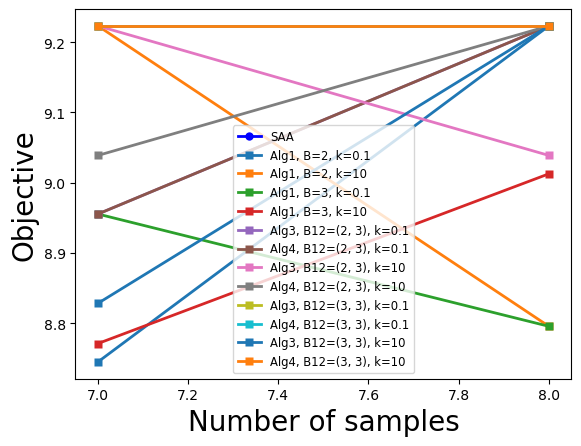

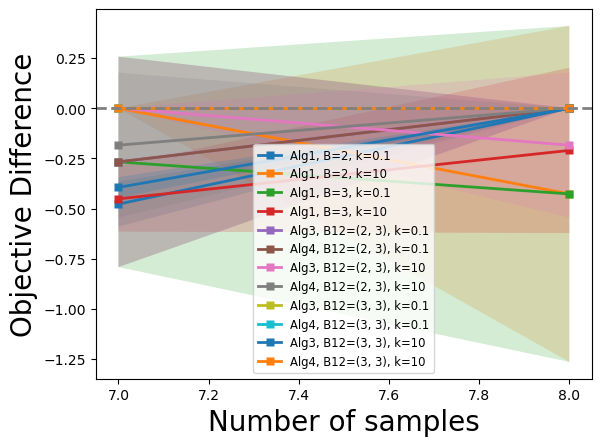

In [5]:
plot_twoPhase(SAA_obj_avg, bagging_alg1_obj_avg, bagging_alg3_obj_avg, bagging_alg4_obj_avg, np.log2(sample_number), B_list, k_list, B12_list)
plot_CI_twoPhase(SAA_obj_list, bagging_alg1_obj_list, bagging_alg3_obj_list, bagging_alg4_obj_list, np.log2(sample_number), B_list, k_list, B12_list)

In [12]:
w = {
  "(1, 2)": 2.0,
  "(1, 3)": 2.0,
  "(1, 4)": 2.0,
  "(1, 5)": 1.9119257287734244,
  "(1, 6)": 1.6228257372263202,
  "(1, 7)": 1.7968885916853101,
  "(1, 8)": 2.313248853705918,
  "(2, 3)": 2.0,
  "(2, 4)": 2.0,
  "(2, 5)": 1.9362072829402424,
  "(2, 6)": 2.451003072707256,
  "(2, 7)": 2.398840628680899,
  "(2, 8)": 1.8209819889450793,
  "(3, 4)": 2.0,
  "(3, 5)": 1.9978624908336502,
  "(3, 6)": 2.0670783259937506,
  "(3, 7)": 1.8577180932652504,
  "(3, 8)": 2.3907208610757693,
  "(4, 5)": 2.203256964324676,
  "(4, 6)": 2.422592793261833,
  "(4, 7)": 1.6985434453495578,
  "(4, 8)": 1.9787435233099542,
  "(5, 6)": 2,
  "(5, 7)": 2,
  "(5, 8)": 2,
  "(6, 7)": 2,
  "(6, 8)": 2,
  "(7, 8)": 2
 }

# make the keys to be tuples
w = {eval(k):v for k,v in w.items()}
w

{(1, 2): 2.0,
 (1, 3): 2.0,
 (1, 4): 2.0,
 (1, 5): 1.9119257287734244,
 (1, 6): 1.6228257372263202,
 (1, 7): 1.7968885916853101,
 (1, 8): 2.313248853705918,
 (2, 3): 2.0,
 (2, 4): 2.0,
 (2, 5): 1.9362072829402424,
 (2, 6): 2.451003072707256,
 (2, 7): 2.398840628680899,
 (2, 8): 1.8209819889450793,
 (3, 4): 2.0,
 (3, 5): 1.9978624908336502,
 (3, 6): 2.0670783259937506,
 (3, 7): 1.8577180932652504,
 (3, 8): 2.3907208610757693,
 (4, 5): 2.203256964324676,
 (4, 6): 2.422592793261833,
 (4, 7): 1.6985434453495578,
 (4, 8): 1.9787435233099542,
 (5, 6): 2,
 (5, 7): 2,
 (5, 8): 2,
 (6, 7): 2,
 (6, 8): 2,
 (7, 8): 2}

In [10]:
def generateW(N):
    # this script is also used to find good parameters
    # using 1-based index
    w = {}
    for i in range(1, N):
        for j in range(i+1, N+1):
            if i <= 3 and j <= 4:
                w[(i,j)] = None # place holder
            elif N >= 8 and i >= N-3 and j >= N-2:
                w[(i,j)] = 2 # fixed weight
            else:
                w[(i,j)] = np.random.uniform(1.5, 2.5)
    return w
w = generateW(8)

In [11]:
w
# make a copy of w so that the original w will not be changed
w2 = w.copy()

{(1, 2): None,
 (1, 3): None,
 (1, 4): None,
 (1, 5): 1.541695246456222,
 (1, 6): 1.8281499417149667,
 (1, 7): 1.7858472187764196,
 (1, 8): 1.5013502073537899,
 (2, 3): None,
 (2, 4): None,
 (2, 5): 2.30619548433829,
 (2, 6): 1.530166413577417,
 (2, 7): 1.7757220103653504,
 (2, 8): 2.373636405152057,
 (3, 4): None,
 (3, 5): 2.382565373845792,
 (3, 6): 1.9549459496885389,
 (3, 7): 1.5466115901215294,
 (3, 8): 2.3977386545960457,
 (4, 5): 2.0263379192150115,
 (4, 6): 1.9803873404580472,
 (4, 7): 1.5594272615282367,
 (4, 8): 2.4811289792670834,
 (5, 6): 2,
 (5, 7): 2,
 (5, 8): 2,
 (6, 7): 2,
 (6, 8): 2,
 (7, 8): 2}

In [3]:
import numpy as np
from utils.plotting import plot_optGap_twoPhase
from utils.matching_functions import matching_obj_optimal
import json

In [2]:
N = 8
w = {(1, 2): None,
    (1, 3): None,
    (1, 4): None,
    (1, 5): 1.9119257287734244,
    (1, 6): 1.6228257372263202,
    (1, 7): 1.7968885916853101,
    (1, 8): 2.313248853705918,
    (2, 3): None,
    (2, 4): None,
    (2, 5): 1.9362072829402424,
    (2, 6): 2.451003072707256,
    (2, 7): 2.398840628680899,
    (2, 8): 1.8209819889450793,
    (3, 4): None,
    (3, 5): 1.9978624908336502,
    (3, 6): 2.0670783259937506,
    (3, 7): 1.8577180932652504,
    (3, 8): 2.3907208610757693,
    (4, 5): 2.203256964324676,
    (4, 6): 2.422592793261833,
    (4, 7): 1.6985434453495578,
    (4, 8): 1.9787435233099542,
    (5, 6): 2,
    (5, 7): 2,
    (5, 8): 2,
    (6, 7): 2,
    (6, 8): 2,
    (7, 8): 2}
sample_args = {
    "type" : "pareto",
    "params": [2,2,2,2,2,2]
}

B_list = [200]
k_list = [0.1, 10, 50]
B12_list = [(20,200)]
sample_number = np.array([2**i for i in range(7, 13)])

obj_opt = matching_obj_optimal(sample_args, N, w)

In [5]:
with open("obj_lists.json", "r") as f:
    results = json.load(f)
print(results.keys())

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


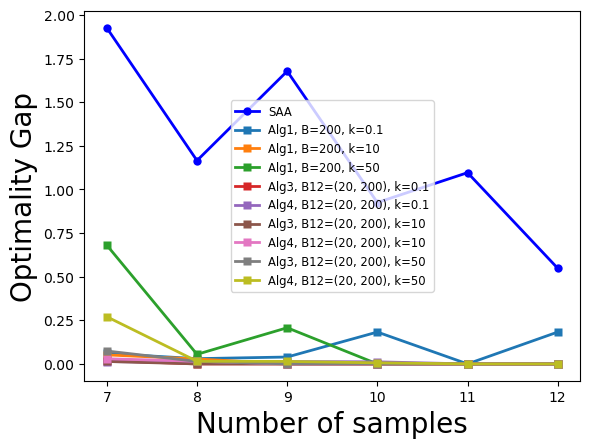

In [8]:
plot_optGap_twoPhase(obj_opt, "max", results["SAA_obj_avg"], results["bagging_alg1_obj_avg"], results["bagging_alg3_obj_avg"], results["bagging_alg4_obj_avg"], np.log2(sample_number), B_list, k_list, B12_list)

In [1]:
import numpy as np
from utils.plotting import plot_epsilonComparison
import json

In [2]:
with open("obj_lists.json", 'r') as f:
    results = json.load(f)

In [3]:
results.keys()

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])

In [4]:
B = 200
k = 10
B12 = (20,200)
epsilon_list = [0] + np.array([2**i for i in range(-9,2)]).tolist() + ['dynamic']
sample_number = np.array([2**i for i in range(6, 13)])

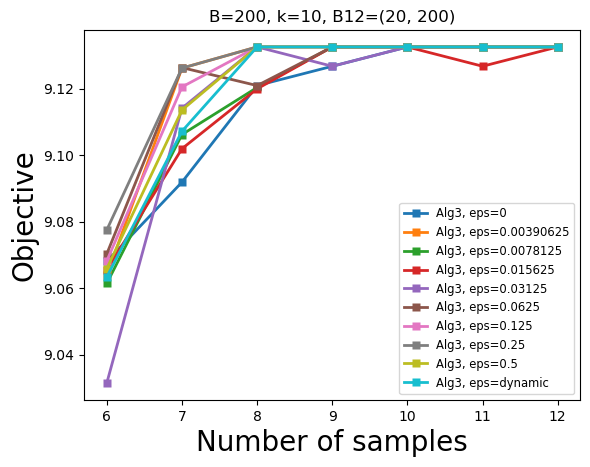

In [7]:
epsilon_list[-2] = 'X'
epsilon_list[-3] = 'X'
epsilon_list[1] = 'X'
plot_epsilonComparison(None, None, results["bagging_alg3_obj_avg"], None, np.log2(sample_number), B, k, B12, epsilon_list)

In [8]:
with open("solution_lists.json", "r") as f:
    sol_results = json.load(f)

In [10]:
sol_results.keys()

dict_keys(['SAA', 'bagging_alg1', 'bagging_alg3', 'bagging_alg4', 'dyn_eps_alg3', 'dyn_eps_alg4'])

In [13]:
np.mean(sol_results['dyn_eps_alg3'], axis = 1)

array([0.15759766, 0.17779297, 0.18845703, 0.20074219, 0.15490234,
       0.15462891, 0.17882813])

In [14]:
np.mean(sol_results['dyn_eps_alg4'], axis = 1)

array([0.14455078, 0.20109375, 0.22037109, 0.20175781, 0.15136719,
       0.17789062, 0.16523437])

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_twoPhase(SAA_obj_avg, bagging_alg1_obj_avg, bagging_alg3_obj_avg, bagging_alg4_obj_avg, sample_number, B_list, k_list, B12_list, name = None):
    _, ax = plt.subplots()
    ax.plot(sample_number, SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')
    for ind1, B in enumerate(B_list):
        for ind2, k in enumerate(k_list):
            if B == "X" or k == "X":
                continue
            ax.plot(sample_number, bagging_alg1_obj_avg[ind1][ind2], marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg1, B={B_list[ind1]}, k={k_list[ind2]}')
    
    for ind1, B12 in enumerate(B12_list):
        for ind2, k in enumerate(k_list):
            if B12 == "X" or k == "X":
                continue
            ax.plot(sample_number, bagging_alg3_obj_avg[ind1][ind2], marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg3, B12={B12_list[ind1]}, k={k_list[ind2]}')
            ax.plot(sample_number, bagging_alg4_obj_avg[ind1][ind2], marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg4, B12={B12_list[ind1]}, k={k_list[ind2]}')
    
    ax.set_xlabel('Number of samples', size = 20)
    ax.set_ylabel('Objective', size = 20)
    ax.set_ylim(51.1,51.2)
    ax.legend(fontsize = 'small')
    if name == None:
        fig_name = "obj_avg_" + str(B_list) + '_' +str(k_list) + '_' + str(B12_list) + ".png"
    else:
        fig_name = name + ".png"
    plt.savefig(fig_name)
    return

def plot_CI_twoPhase(SAA_obj_list, bagging_alg1_obj_list, bagging_alg3_obj_list, bagging_alg4_obj_list, sample_number, B_list, k_list, B12_list):
    number_of_iterations = len(SAA_obj_list[0])
    _, ax = plt.subplots()
    for ind1, B in enumerate(B_list):
        for ind2, k in enumerate(k_list):
            if B == "X" or k == "X":
                continue
            diff_Bk = []
            for i in range(len(sample_number)):
                diff_Bk.append([bagging_alg1_obj_list[ind1][ind2][i][j] - SAA_obj_list[i][j] for j in range(number_of_iterations)])
            
            diff_Bk_mean = np.mean(diff_Bk, axis = 1)
            diff_Bk_std_err = stats.sem(diff_Bk, axis = 1)
            diff_conf_int = 1.96 * diff_Bk_std_err

            ax.plot(sample_number, diff_Bk_mean, marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg1, B={B}, k={k}')
            ax.fill_between(sample_number, diff_Bk_mean - diff_conf_int, diff_Bk_mean + diff_conf_int, alpha = 0.2)

    for ind1, B12 in enumerate(B12_list):
        for ind2, k in enumerate(k_list):
            if B12 == "X" or k == "X":
                continue
            diff_Bk = []
            for i in range(len(sample_number)):
                diff_Bk.append([bagging_alg3_obj_list[ind1][ind2][i][j] - SAA_obj_list[i][j] for j in range(number_of_iterations)])
            
            diff_Bk_mean = np.mean(diff_Bk, axis = 1)
            diff_Bk_std_err = stats.sem(diff_Bk, axis = 1)
            diff_conf_int = 1.96 * diff_Bk_std_err

            ax.plot(sample_number, diff_Bk_mean, marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg3, B12={B12}, k={k}')
            ax.fill_between(sample_number, diff_Bk_mean - diff_conf_int, diff_Bk_mean + diff_conf_int, alpha = 0.2)
            
            diff_Bk = []
            for i in range(len(sample_number)):
                diff_Bk.append([bagging_alg4_obj_list[ind1][ind2][i][j] - SAA_obj_list[i][j] for j in range(number_of_iterations)])
            
            diff_Bk_mean = np.mean(diff_Bk, axis = 1)
            diff_Bk_std_err = stats.sem(diff_Bk, axis = 1)
            diff_conf_int = 1.96 * diff_Bk_std_err

            ax.plot(sample_number, diff_Bk_mean, marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Alg4, B12={B12}, k={k}')
            ax.fill_between(sample_number, diff_Bk_mean - diff_conf_int, diff_Bk_mean + diff_conf_int, alpha = 0.2)
    
    ax.axhline(0, color='grey', linewidth=2, linestyle='--') 
    ax.set_xlabel('Number of samples', size = 20)
    ax.set_ylabel('Objective Difference', size = 20)
    ax.legend(fontsize = 'small')
    fig_name = "obj_diff_" + str(B_list) + '_' +str(k_list) + '_' + str(B12_list) + ".png"
    plt.savefig(fig_name)
    return

In [7]:
with open("obj_lists.json", "r") as f:
    results = json.load(f)
print(results.keys())

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


In [8]:
B_list = [200]
k_list = [0.1, 10]
B12_list = [(20,200)]
epsilon = "dynamic"
tolerance = 0.005
number_of_iterations = 50
sample_number = np.array([2**i for i in range(7, 12)])

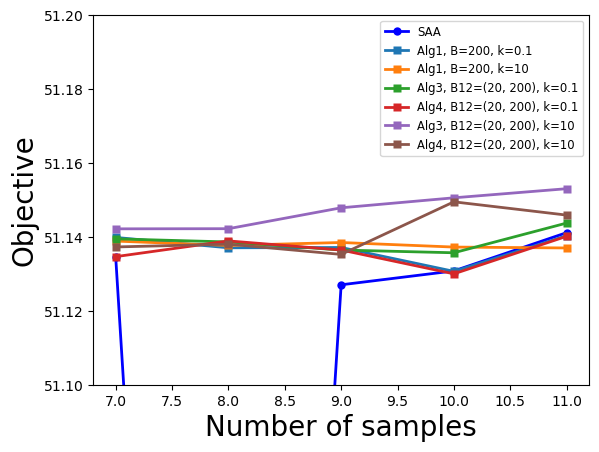

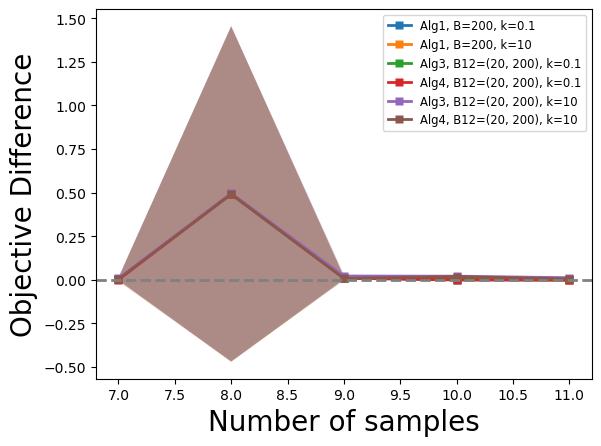

In [9]:
plot_twoPhase(results["SAA_obj_avg"], results["bagging_alg1_obj_avg"], results["bagging_alg3_obj_avg"], results["bagging_alg4_obj_avg"], np.log2(sample_number), B_list, k_list, B12_list)
plot_CI_twoPhase(results["SAA_obj_list"], results["bagging_alg1_obj_list"], results["bagging_alg3_obj_list"], results["bagging_alg4_obj_list"], np.log2(sample_number), B_list, k_list, B12_list)